## **Group name:  Data Doc's**
## Created by NAMES (SJSU IDs)  
- **Leonardo Flores Gonzalez** 013475436  
- **Christina Vo** 015626312  
- **Sadiya Rahman** 016023033
## Last updated: 11/27/2025
## **Dataset Description:**
The dataset used in this project comes from the CDC’s Behavioral Risk Factor Surveillance System (BRFSS), a large national survey that collects health-related data from adults across the United States. The raw dataset includes hundreds of thousands of records and contains measurements for multiple health conditions such as nutrition, physical activity, chronic diseases, and obesity. Each row represents a survey response for a specific demographic group, with fields including age, sex, education, income, race/ethnicity, state, sample size, and a reported percentage (Data_Value) describing the health condition being measured. Because the dataset includes many disease categories, the Class column identifies which health topic each row corresponds to. For this project, we focus specifically on obesity trends, so only rows where the Class is “Obesity / Weight Status” are used in the analysis.

## **Exploratory Data Analysis (EDA) Overview:**

After cleaning the dataset and filtering for obesity-related records, we performed exploratory data analysis to better understand the patterns and trends within the data. Our EDA examines key variables such as obesity percentages (Data_Value), sample sizes, demographic categories (age, sex, income, education, race/ethnicity), and geographic differences across U.S. states. We use visualizations to explore distributions, correlations, missing-data patterns, and demographic imbalances. These insights help reveal how obesity values vary across different population groups and provide context for interpreting the dataset before building more advanced analyses.


Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/CS133_Project/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Keep a copy of the original data for comparison
df_raw = df.copy()

# Fix column names by removing extra whitespace
df.columns = df.columns.str.strip()

# Show first few rows
df.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


## Data Cleaning Summary

To prepare the dataset for analysis, we performed the following cleaning steps:

- **Removed rows with missing important values**
Rows missing essential fields (Data_Value, Sample_Size, and YearStart) were dropped to prevent inaccurate or incomplete results.

- **Filtered the dataset to obesity-related records only**
Because the project focuses on obesity trends, rows related to other diseases were removed.

- **Filled missing demographic categories**
Many demographic fields had missing values (Sex, Education, Income, Age, Race/Ethnicity).
Instead of deleting those rows, we replaced missing entries with "Unknown" so those records could still be used for analysis.

- **Standardized column names**
Removed extra whitespace to prevent issues when referencing columns.

These steps ensure the dataset is clean, consistent, and ready for exploratory data analysis.

## Data Cleaning

In [ ]:
# --- Standardize column names ---
df.columns = df.columns.str.strip()

# --- Keep only obesity-related records ---
df = df[df['Class'] == 'Obesity / Weight Status'].copy()

# --- Remove rows missing essential numeric fields ---
df = df[
    df['Data_Value'].notna() &
    df['Sample_Size'].notna() &
    df['YearStart'].notna()
].copy()

# --- Fill missing demographic categories ---
demo_cols = ['Sex', 'Education', 'Income', 'Race/Ethnicity', 'Age(years)']
for col in demo_cols:
    df[col] = df[col].fillna('Unknown')

df.head()




,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


### Q1: Show the number of missing data in each column of the dataframe

From this missing-data summary, we identified which fields required cleaning.
Columns such as Data_Value, Sample_Size, and YearStart are essential for our
visualizations, so any rows missing these values were removed to avoid inaccurate
or incomplete results.

Some demographic fields (for example, Sex) had missing entries. Instead of removing
these rows entirely, we replaced missing demographic values with "Unknown" so we
could keep the records for analysis.

Overall, the missing-value report guided the cleaning steps shown above and ensured
the dataset was consistent and ready for visualization.


In [ ]:
# Count missing values in each column
df.isnull().sum()


,0
YearStart,0
YearEnd,0
LocationAbbr,0
LocationDesc,0
Datasource,0
Class,0
Topic,0
Question,0
Data_Value_Unit,106260
Data_Value_Type,0


### Q2: Show the data type for each column of the dataframe

This output shows the data type of each column in the dataset. Most demographic variables (such as LocationAbbr, Income, Race/Ethnicity, and Education) are stored as object types, meaning they are categorical. Key numeric fields (like Data_Value, Low_Confidence_Limit, High_Confidence_Limit, and Sample_Size) are stored as float64.

Some fields that look numeric (such as Age(years) and Total) are also stored as objects, which means they may need cleaning or conversion before analysis. Identifying these data types helps us understand which columns can be used directly and which require preprocessing for accurate visualization and modeling.

In [ ]:
# Show data type for each column
df.dtypes


,0
YearStart,int64
YearEnd,int64
LocationAbbr,object
LocationDesc,object
Datasource,object
Class,object
Topic,object
Question,object
Data_Value_Unit,float64
Data_Value_Type,object


### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

This pair plot visualizes relationships among the key numeric variables in the dataset: Data_Value, Sample_Size, Low_Confidence_Limit, and High_Confidence_Limit. Polynomial regression lines are added to the lower triangle to reveal possible non-linear trends that may not be obvious from the scatter plots alone. The KDE plots on the diagonal summarize the distribution of each variable.

From the pairwise relationships, we observe that Low_Confidence_Limit and High_Confidence_Limit show strong linear trends with Data_Value, indicating consistent measurement patterns across the dataset. In contrast, Sample_Size displays a weaker and more irregular relationship with the other variables. These insights help identify which numerical features carry meaningful structure, supporting more informed decisions for deeper visualization or modeling in later stages.


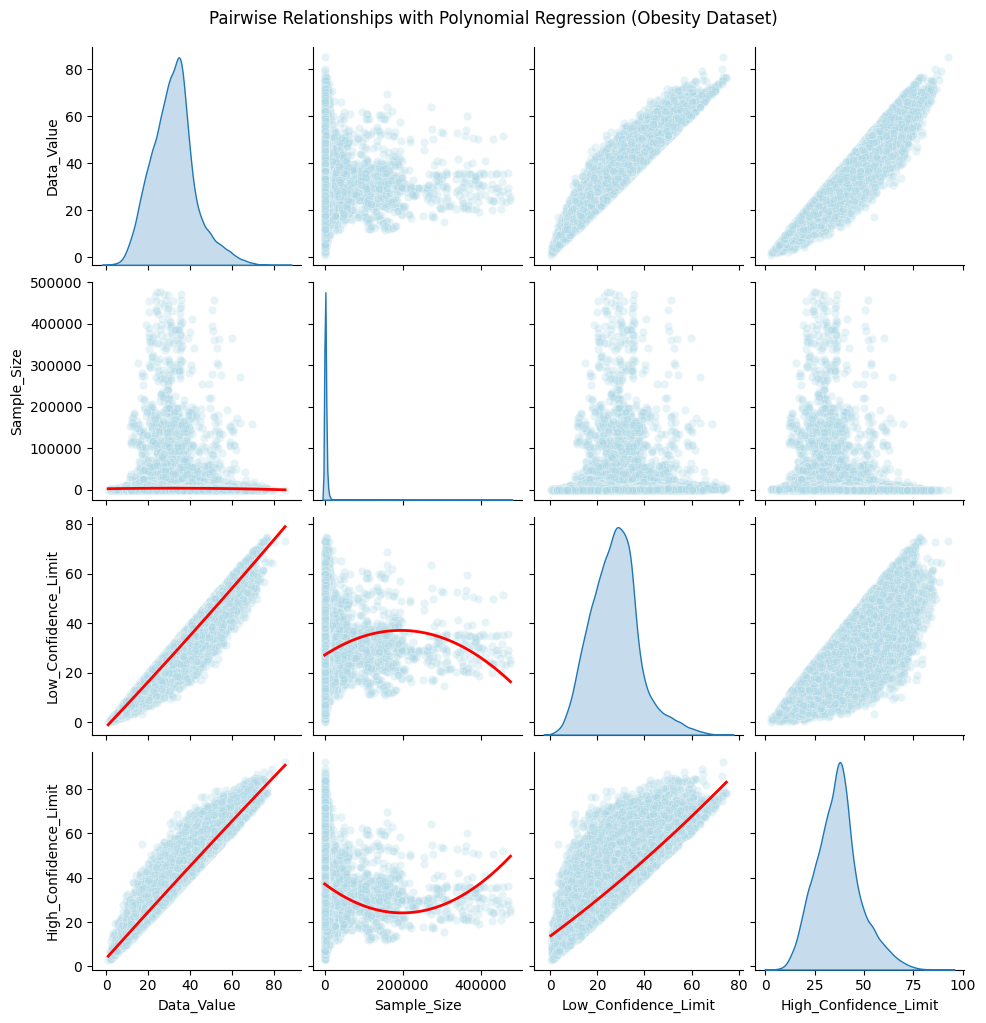

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define custom polynomial regression function (degree 2)
def poly_reg(x, y, **kwargs):
    if len(np.unique(x)) > 2:  # Only fit when x has enough unique values
        p = np.polyfit(x, y, deg=2)          # Fit polynomial
        xp = np.linspace(x.min(), x.max(), 100)  # Smooth x range
        yp = np.polyval(p, xp)               # Evaluate polynomial
        plt.plot(xp, yp, color="red", linewidth=2)  # Plot curve

# Keep selected numeric columns
cols_to_plot = ["Data_Value", "Sample_Size", "Low_Confidence_Limit", "High_Confidence_Limit"]
small_df = df[cols_to_plot].dropna()

# Create pairplot with KDE diagonals and polynomial curves in lower triangle
sns.pairplot(
    small_df,
    plot_kws={'alpha': 0.3, 'color': 'lightblue'},
    diag_kind="kde"
).map_lower(poly_reg)

# Add title to entire figure
plt.suptitle("Pairwise Relationships with Polynomial Regression (Obesity Dataset)", y=1.02)

plt.show()



### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

This regression plot examines the relationship between Low_Confidence_Limit and High_Confidence_Limit, two related numeric variables in the dataset. The scatter points show a strong positive linear pattern, and the regression line (with confidence interval) confirms that higher low-limit values correspond closely with higher high-limit values.

The tight confidence band and consistent upward trend indicate a stable and reliable linear relationship between these features. This helps identify which variables may serve as good predictors in future visualizations or modeling tasks.

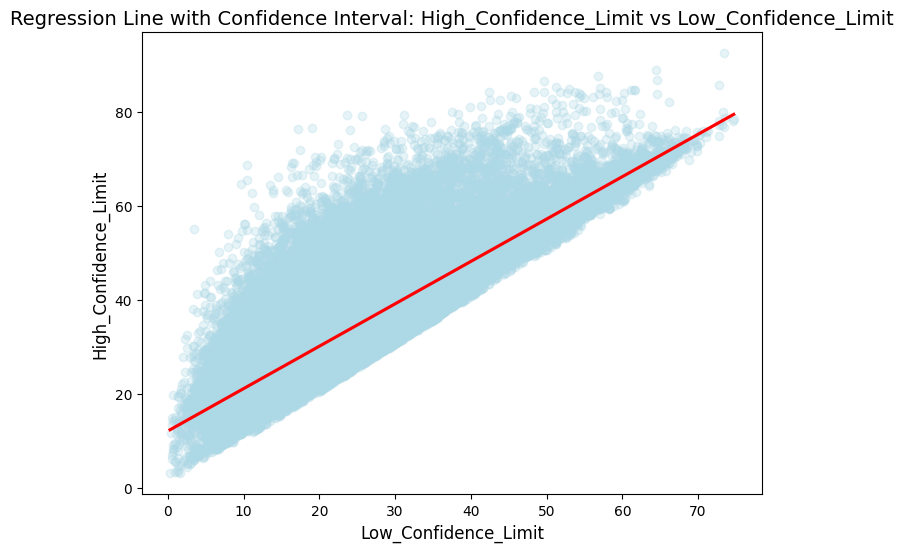

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select the two numeric columns for regression
x_col = "Low_Confidence_Limit"
y_col = "High_Confidence_Limit"

# Create the figure
plt.figure(figsize=(8,6))

# Plot scatter + regression line
sns.regplot(
    data=df,
    x=x_col,
    y=y_col,
    scatter_kws={'alpha':0.3, 'color':'lightblue'},  # light scatter points
    line_kws={'color':'red'}                         # regression line in red
)

# Add title and axis labels
plt.title(f"Regression Line with Confidence Interval: {y_col} vs {x_col}", fontsize=14)
plt.xlabel(x_col, fontsize=12)
plt.ylabel(y_col, fontsize=12)

plt.show()



### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

This plot shows how Data_Value changes with Sample_Size, while also using two extra features to add more insight: Sex (color) and Age group (bubble size).
Coloring the points by Sex helps compare patterns between Male, Female, and Unknown (missing values).
The bubble sizes represent different age ranges, making it easier to see if certain age groups have higher or lower obesity percentages.

A large portion of the points fall under the Unknown category, which indicates that many rows in the dataset are missing Sex information.
We can also see that larger sample sizes mostly produce mid-range Data_Value values, while very high Data_Value values tend to occur in smaller samples.

Overall, this replot highlights how multiple demographic variables interact and also shows the dataset’s imbalance, especially the large number of missing Sex entries.


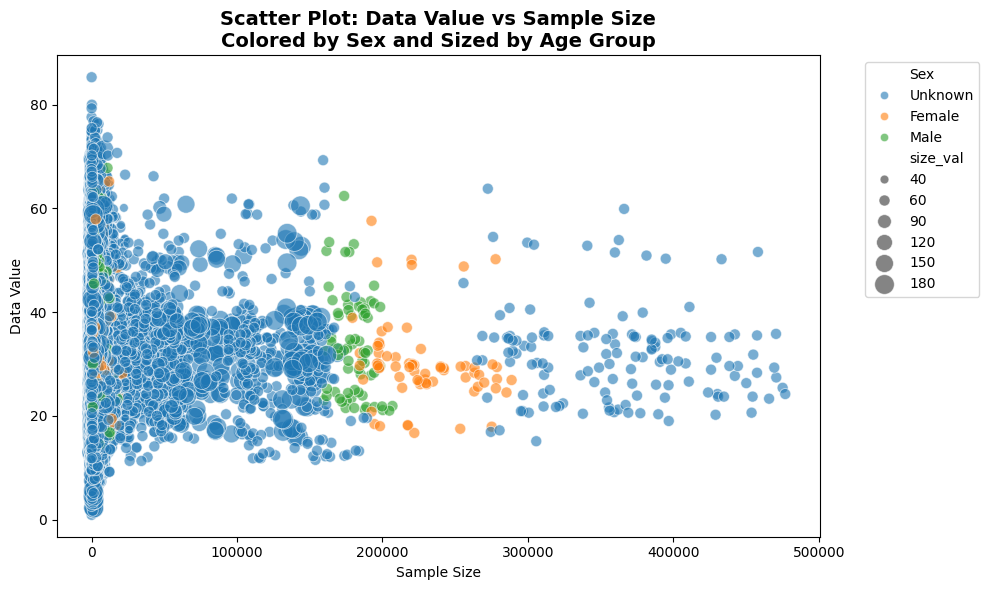

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fix any extra spaces in column names
df.columns = df.columns.str.strip()

# Keep only rows with valid Sample_Size and Data_Value
filtered_df = df[df["Sample_Size"].notna() & df["Data_Value"].notna()].copy()

# Replace missing Sex values with "Unknown"
filtered_df["Sex"] = filtered_df["Sex"].fillna("Unknown")

# Replace missing Age groups so bubble sizes still work
filtered_df["Age(years)"] = filtered_df["Age(years)"].fillna("Unknown Age Group")

# Map Age groups to bubble sizes
size_map = {
    "18 - 24": 40,
    "25 - 34": 60,
    "35 - 44": 90,
    "45 - 54": 120,
    "55 - 64": 150,
    "65 or older": 180,
    "Unknown Age Group": 60
}

# Create bubble-size column
filtered_df["size_val"] = filtered_df["Age(years)"].map(size_map)

# Build scatter plot
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=filtered_df,
    x="Sample_Size",
    y="Data_Value",
    hue="Sex",
    size="size_val",
    sizes=(40,200),
    alpha=0.6
)

# Add title and axis labels
plt.title(
    "Scatter Plot: Data Value vs Sample Size\nColored by Sex and Sized by Age Group",
    fontsize=14, fontweight="bold"
)
plt.xlabel("Sample Size")
plt.ylabel("Data Value")

# Move legend to the side
plt.legend(bbox_to_anchor=(1.05,1), loc=2)

# Adjust layout so nothing overlaps
plt.tight_layout()

plt.show()


### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

This small-multiples plot shows how Data_Value varies with Sample_Size when split by Sex.
By separating the data into three individual panels (Unknown, Female, Male), the plot makes it easier to compare how each group behaves without the overlap seen in a single scatter plot.

Unknown has by far the most points, showing many missing Sex values in the dataset.

Female and Male panels show fewer points but cleaner patterns, making it easier to interpret their distributions.

Across all groups, smaller Sample_Size values tend to show more spread in Data_Value, while larger samples show mid-range Data_Values.

Overall, this small-multiples plot exposes differences in data distribution across Sex categories and highlights the dataset’s imbalance in demographic completeness.


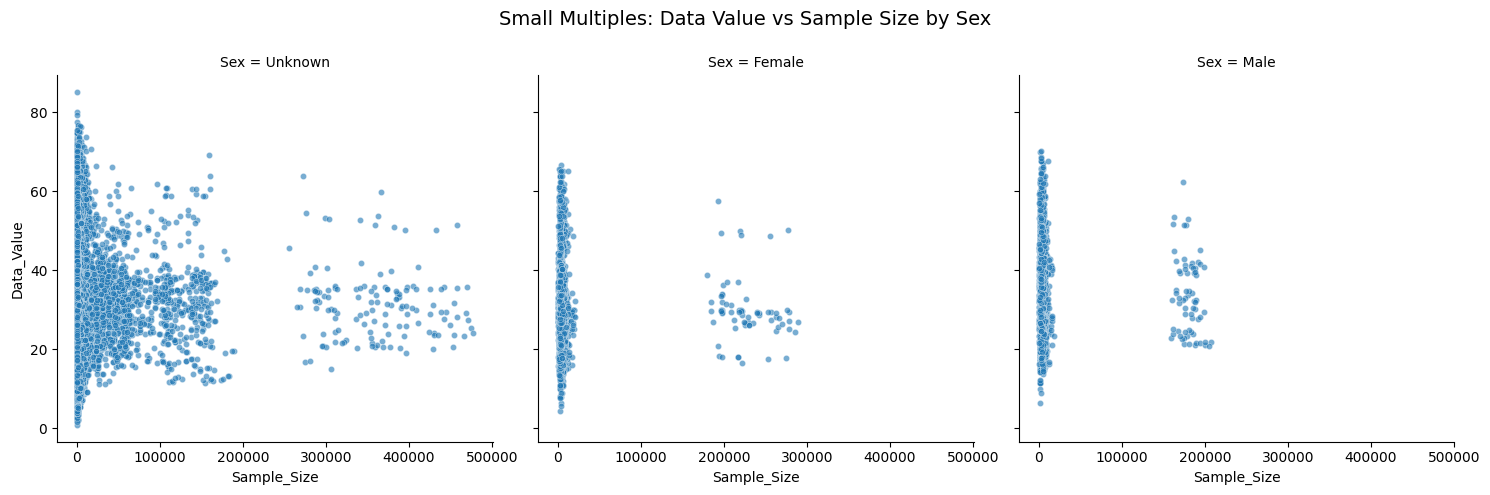

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names
df.columns = df.columns.str.strip()

# Keep rows with valid Sample_Size and Data_Value
temp_df = df[df["Sample_Size"].notna() & df["Data_Value"].notna()].copy()

# Fill missing Sex values
temp_df["Sex"] = temp_df["Sex"].fillna("Unknown")

# Create small multiples (one plot per Sex group)
g = sns.relplot(
    data=temp_df,
    x="Sample_Size",
    y="Data_Value",
    col="Sex",
    col_wrap=3,
    height=5,
    s=20,
    alpha=0.6
)

# Adjust spacing for title
g.fig.subplots_adjust(top=0.85)

# Add overall title
g.fig.suptitle("Small Multiples: Data Value vs Sample Size by Sex", fontsize=14)

plt.show()



## Q7: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module
## Question for Graph 1 : Which U.S. state reports the highest average obesity prevalence (Data_Value)?
## Question for Graph 2 : How does obesity prevalence differ between males and females across years?

## **Graph 1:** This bar plot shows the average obesity prevalence for each U.S. state by calculating the mean Data_Value across all years. Because the dataset reports percentages rather than case counts, this visualization correctly reflects population-level obesity rates. The plot makes it easy to compare states and identify which ones have higher or lower average obesity percentages. Overall, this graph answers the question about which state reports the highest average obesity prevalence.

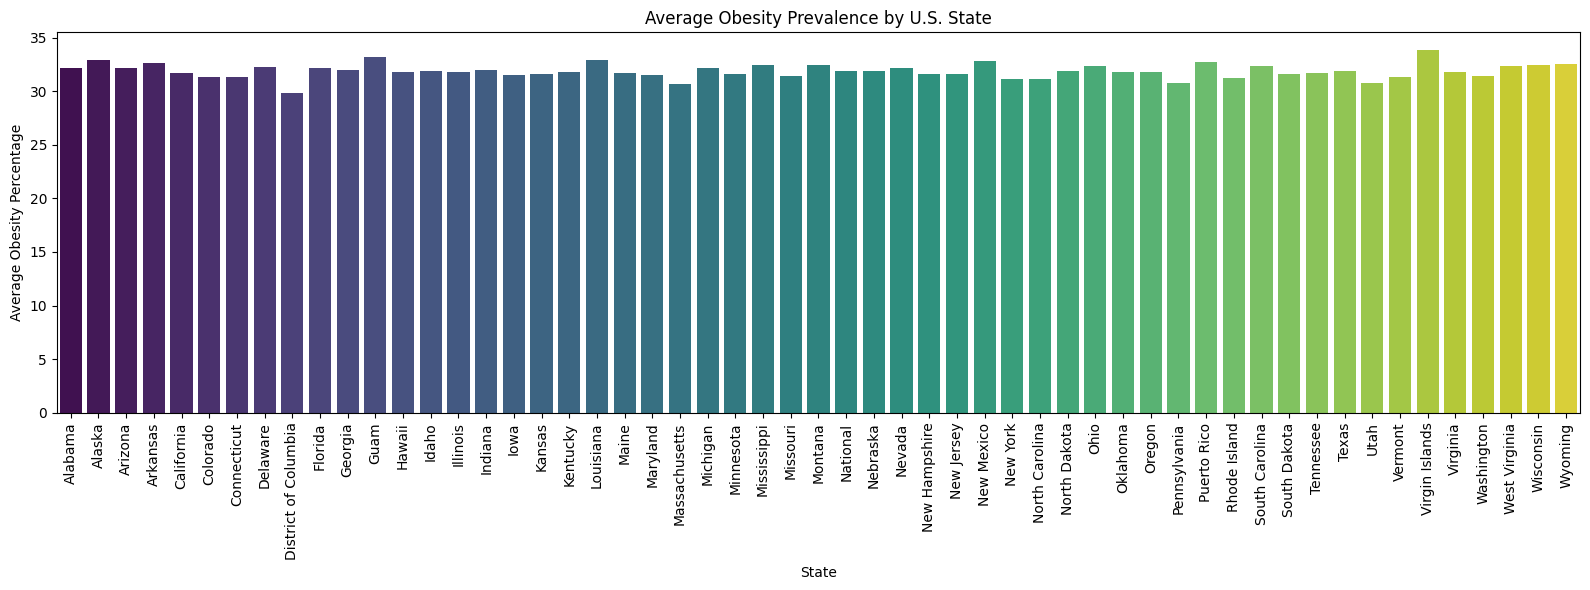

In [ ]:
# ============================
# Graph 1
# Which U.S. state reports the highest average obesity prevalence?
# ============================

# 1) Compute the average obesity percentage for each U.S. state
#    We group by 'LocationDesc' and take the mean of Data_Value
state_avg = df.groupby("LocationDesc")["Data_Value"].mean().reset_index()

# 2) Create the bar plot
plt.figure(figsize=(16, 6))

sns.barplot(
    data=state_avg,
    x="LocationDesc",
    y="Data_Value",
    hue="LocationDesc",
    palette="viridis",    # color palette
    legend=False          # hide legend because hue = x creates many labels
)

# 3) Improve readability
plt.xticks(rotation=90)
plt.title("Average Obesity Prevalence by U.S. State")
plt.xlabel("State")
plt.ylabel("Average Obesity Percentage")

# 4) Prevent labels from overlapping
plt.tight_layout()

# 5) Display the plot
plt.show()



## **Graph 2:** This strip plot compares obesity prevalence between males and females across different years using the percentage values in the dataset. Each point represents an obesity percentage for a specific sex in a given year, allowing us to observe how male and female values differ over time. The plot clearly shows distribution patterns for both sexes and answers the question about how obesity prevalence varies between males and females across years, using categorical data appropriately.

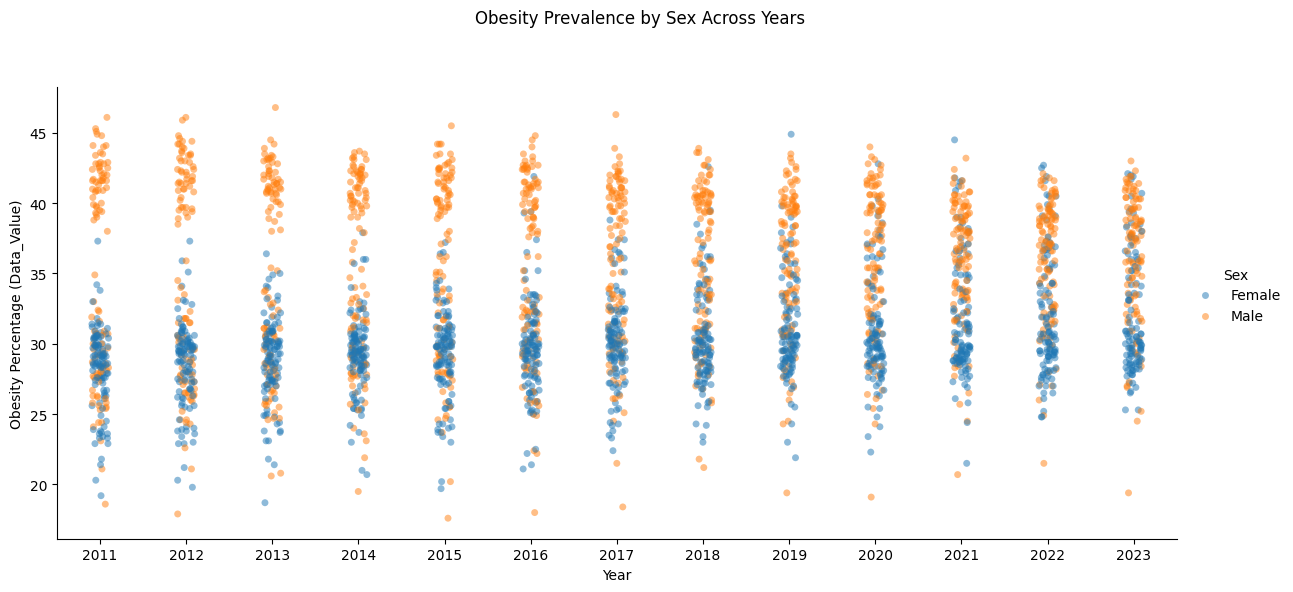

In [ ]:
# -------------------------------
# Graph 2: Obesity Prevalence by Sex Across Years
# -------------------------------

# 1) Filter only rows that belong to obesity-related records
df_obesity = df[df["Class"].str.contains("Obesity", na=False)]

# 2) Keep only rows with valid Sex + Data_Value + YearStart
df_obesity = df_obesity.dropna(subset=["Sex", "Data_Value", "YearStart"])

# 3) Convert YearStart into string so seaborn treats it as a category
df_obesity["YearStart"] = df_obesity["YearStart"].astype(str)

# 4) Create a categorical stripplot showing sex differences across years
plt.figure(figsize=(14, 6))
plt.close()   # prevents empty first figure

sns.catplot(
    data=df_obesity,
    x="YearStart",
    y="Data_Value",
    hue="Sex",
    kind="strip",
    jitter=True,
    alpha=0.5,
    height=6,
    aspect=2
)

plt.subplots_adjust(top=0.85)
plt.suptitle("Obesity Prevalence by Sex Across Years")

plt.xlabel("Year")
plt.ylabel("Obesity Percentage (Data_Value)")
plt.show()


## Q8: Come up with a another unique question. This question must use map() or apply()

How many unique values does each column in the dataset contain?

This question uses the apply() function to calculate how many unique values appear in each column. The lambda expression runs nunique() on every column, allowing us to quickly summarize the dataset's complexity. Columns with many unique values (such as Sample_Size or Data_Value) may require normalization or binning, while columns with few unique values (such as Sex or Education) can be treated as categorical variables. This initial exploration helps inform how we may preprocess the data later for visualization or machine learning.

In [ ]:
# We use apply() because it lets us apply a function to every column of the DataFrame.
# The lambda function x: x.nunique() calculates how many unique values are present in each column.

unique_counts = df.apply(lambda x: x.nunique())

# Display the result
unique_counts


,0
YearStart,13
YearEnd,13
LocationAbbr,55
LocationDesc,55
Datasource,1
Class,3
Topic,3
Question,9
Data_Value_Unit,0
Data_Value_Type,1


### Creating an Additional Categorical Column: Obesity_Level

To better understand the obesity percentages in the dataset, we create a new
categorical column called **Obesity_Level**. This groups obesity percentages
(Data_Value) into meaningful categories: Low, Moderate, and High.


In [ ]:
# Create a new categorical obesity level column
df['Obesity_Level'] = pd.cut(
    df['Data_Value'],
    bins=[0, 20, 30, 100],
    labels=['Low', 'Moderate', 'High']
)

# Show counts for each category
df['Obesity_Level'].value_counts()


,count
Obesity_Level,
High,53190
Moderate,28347
Low,11968


## Q9: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

Which U.S. states have the highest and lowest average obesity percentages?



This interactive Plotly bar chart shows the average obesity percentage in each U.S. state, sorted from lowest to highest. Sorting the values makes the comparison much clearer and directly improves the overall visualization. The interactive features—such as hover labels and zooming—help the viewer quickly identify which states have the highest or lowest obesity rates. This strengthens communication because the audience can explore exact percentages without cluttering the chart with too many labels.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# 1) Calculate the average obesity percentage for each U.S. state.
# We group by "LocationDesc" because this column contains the full state names.
# Then we compute the mean obesity percentage for each state.
# Sorting the states by obesity percentage makes the visualization much clearer.
average_obesity_per_state = (
    df_obesity.groupby("LocationDesc")["Data_Value"]
    .mean()
    .reset_index()
    .sort_values("Data_Value", ascending=True)   # Sort from lowest → highest
)

# 2) Create an interactive bar chart using Plotly.
# Hovering over each bar reveals the exact obesity percentage,
# which helps the audience quickly compare states.
fig = px.bar(
    average_obesity_per_state,
    x="LocationDesc",
    y="Data_Value",
    title="Average Obesity Percentage by U.S. State (Sorted)",
    labels={"LocationDesc": "State", "Data_Value": "Average Obesity Percentage"},
    hover_data={"Data_Value": ":.2f"},
)

# Rotate x-axis labels so all 50 states are readable.
fig.update_layout(
    xaxis_tickangle=-90,
    height=600
)

fig.show()


## Q10: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data? How would you combine the dataset? Do you need to reshape your data and how could you go about it?

To strengthen the obesity analysis, I would include an additional dataset containing median household income or education levels (e.g., % with college degree) for each U.S. state and year. These socioeconomic variables are strongly correlated with health outcomes, so merging them with our obesity dataset can reveal deeper patterns that the obesity dataset alone cannot show.

I would merge this new dataset with the existing obesity dataset using the common keys “LocationDesc” (State) and “YearStart” (Year). After merging, the combined dataset could be reshaped to compare obesity percentages with income or education using scatter plots, correlation heatmaps, or pairplots. This helps determine whether lower income or lower education levels are associated with higher obesity rates.

Below is pseudocode showing how the datasets would be combined and explored:

In [ ]:
# Load both datasets
df_obesity = pd.read_csv("obesity_data.csv")
df_income = pd.read_csv("income_data.csv")   # hypothetical dataset

# Merge on shared columns (State + Year)
merged_df = pd.merge(
    df_obesity,
    df_income,
    on=["LocationDesc", "YearStart"],
    how="inner"
)

# Example visualization: Relationship between income and obesity
sns.scatterplot(
    data=merged_df,
    x="Median_Income",
    y="Data_Value"
)
plt.title("Relationship Between Median Income and Obesity Rates")
plt.xlabel("Median Household Income")
plt.ylabel("Obesity Percentage")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'obesity_data.csv'